In [16]:
#!pip install missingno

In [17]:
import pandas as pd
import pandas as pd
#import missingno as msno
from numpy.core.multiarray import result_type



In [18]:
keep = ['NU_ANO_CENSO','SG_UF','CO_ENTIDADE','CO_MUNICIPIO',
        'TP_SITUACAO_FUNCIONAMENTO','TP_DEPENDENCIA','TP_LOCALIZACAO',
        'IN_LOCAL_FUNC_GALPAO','IN_PREDIO_COMPARTILHADO',
        'IN_AGUA_REDE_PUBLICA','IN_ENERGIA_REDE_PUBLICA',
        'IN_LIXO_SERVICO_COLETA','IN_ALMOXARIFADO', 'IN_AUDITORIO',
        'IN_BIBLIOTECA','IN_BIBLIOTECA_SALA_LEITURA','IN_LABORATORIO_CIENCIAS',
        'IN_LABORATORIO_INFORMATICA','IN_QUADRA_ESPORTES',
        'IN_SALA_DIRETORIA','IN_SECRETARIA','QT_SALAS_UTILIZADAS_DENTRO',
        'QT_SALAS_UTILIZA_CLIMATIZADAS','IN_COMPUTADOR','IN_EQUIP_COPIADORA',
        'IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT','IN_INTERNET',
        'IN_BANDA_LARGA','QT_PROF_ADMINISTRATIVOS','QT_PROF_GESTAO',
        'IN_ORGAO_ASS_PAIS','IN_ORGAO_ASS_PAIS_MESTRES',
        'IN_ORGAO_CONSELHO_ESCOLAR','IN_ORGAO_GREMIO_ESTUDANTIL',
        'TP_PROPOSTA_PEDAGOGICA','IN_REGULAR','IN_EJA']

In [19]:
# read data
filemainpath = "/home/freitas/Downloads/internet2/"
censo = {}
for year in range(2014, 2020):
    filepath = f'microdados_censo_escolar_{year}/{year}/dados/'
    filename = f'microdados_ed_basica_{year}.csv'
    censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
    censo['censo_'+str(year)] = censo['censo_'+str(year)][keep]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_SITUACAO_FUNCIONAMENTO == 1)]
    censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_DEPENDENCIA == 2) | (censo['censo_'+str(year)].TP_DEPENDENCIA == 3)]

/tmp/ipykernel_33401/1017444631.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
/tmp/ipykernel_33401/1017444631.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
/tmp/ipykernel_33401/1017444631.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
/tmp/ipykernel_33401/1017444631.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(filemainpath + filepath + filename, sep=';', encoding='latin1')
/tmp/ipykernel_33401

In [20]:
path_censo_2020 = "/home/freitas/Downloads/internet2/microdados_censo_escolar_2020/2020/dados/"+"microdados_ed_basica_2020.CSV"
year = 2020
censo['censo_'+str(year)] = pd.read_csv(path_censo_2020, sep=';', encoding='latin1')
censo['censo_'+str(year)] = censo['censo_'+str(year)][keep]
censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_SITUACAO_FUNCIONAMENTO == 1)]
censo['censo_'+str(year)] = censo['censo_'+str(year)][(censo['censo_'+str(year)].TP_DEPENDENCIA == 2) | (censo['censo_'+str(year)].TP_DEPENDENCIA == 3)]

/tmp/ipykernel_33401/1823187801.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  censo['censo_'+str(year)] = pd.read_csv(path_censo_2020, sep=';', encoding='latin1')


In [21]:
print(censo.keys())
# merge all dataframes
censo = pd.concat(censo.values(), ignore_index=True)

dict_keys(['censo_2014', 'censo_2015', 'censo_2016', 'censo_2017', 'censo_2018', 'censo_2019', 'censo_2020'])


In [22]:
censo.head()
print(censo.shape)


(1008319, 38)


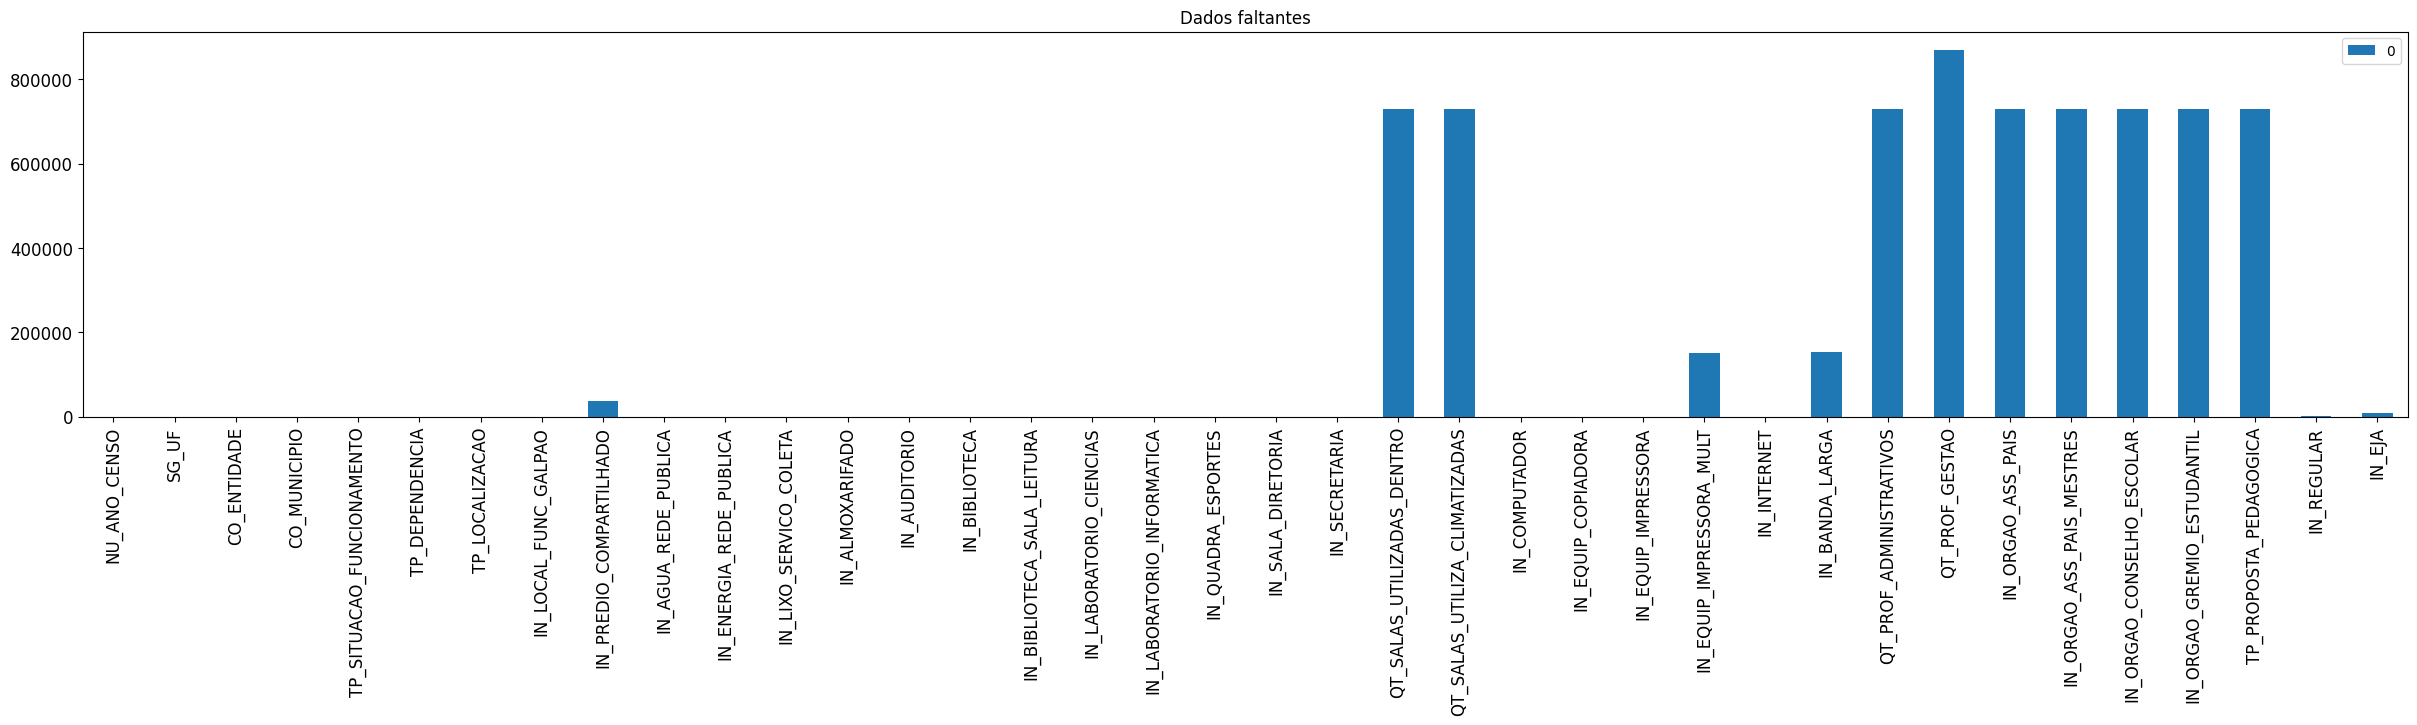

In [23]:
pd.DataFrame(censo.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

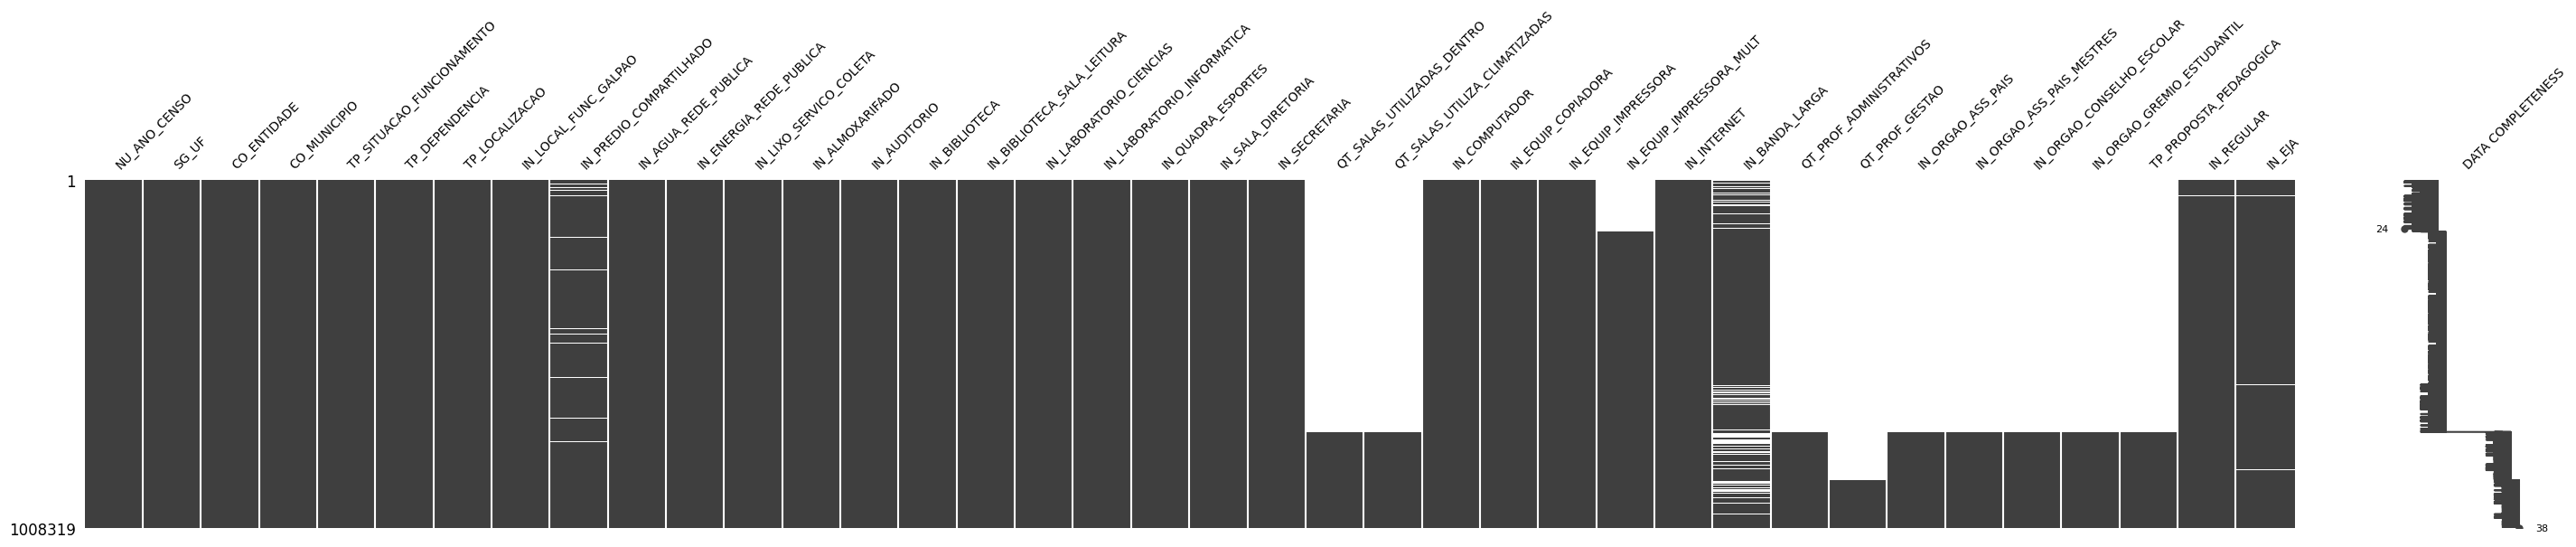

In [24]:
msno.matrix(censo,labels=True,fontsize=10,figsize=(35,5));

In [25]:
drop = ['QT_SALAS_UTILIZADAS_DENTRO', 'QT_SALAS_UTILIZA_CLIMATIZADAS',
        'QT_PROF_ADMINISTRATIVOS', 'QT_PROF_GESTAO','IN_ORGAO_ASS_PAIS', 
        'IN_ORGAO_CONSELHO_ESCOLAR', 'IN_ORGAO_GREMIO_ESTUDANTIL', 
        'TP_PROPOSTA_PEDAGOGICA','IN_ORGAO_ASS_PAIS_MESTRES','IN_EQUIP_IMPRESSORA_MULT']
censo.drop(columns=drop, inplace=True)

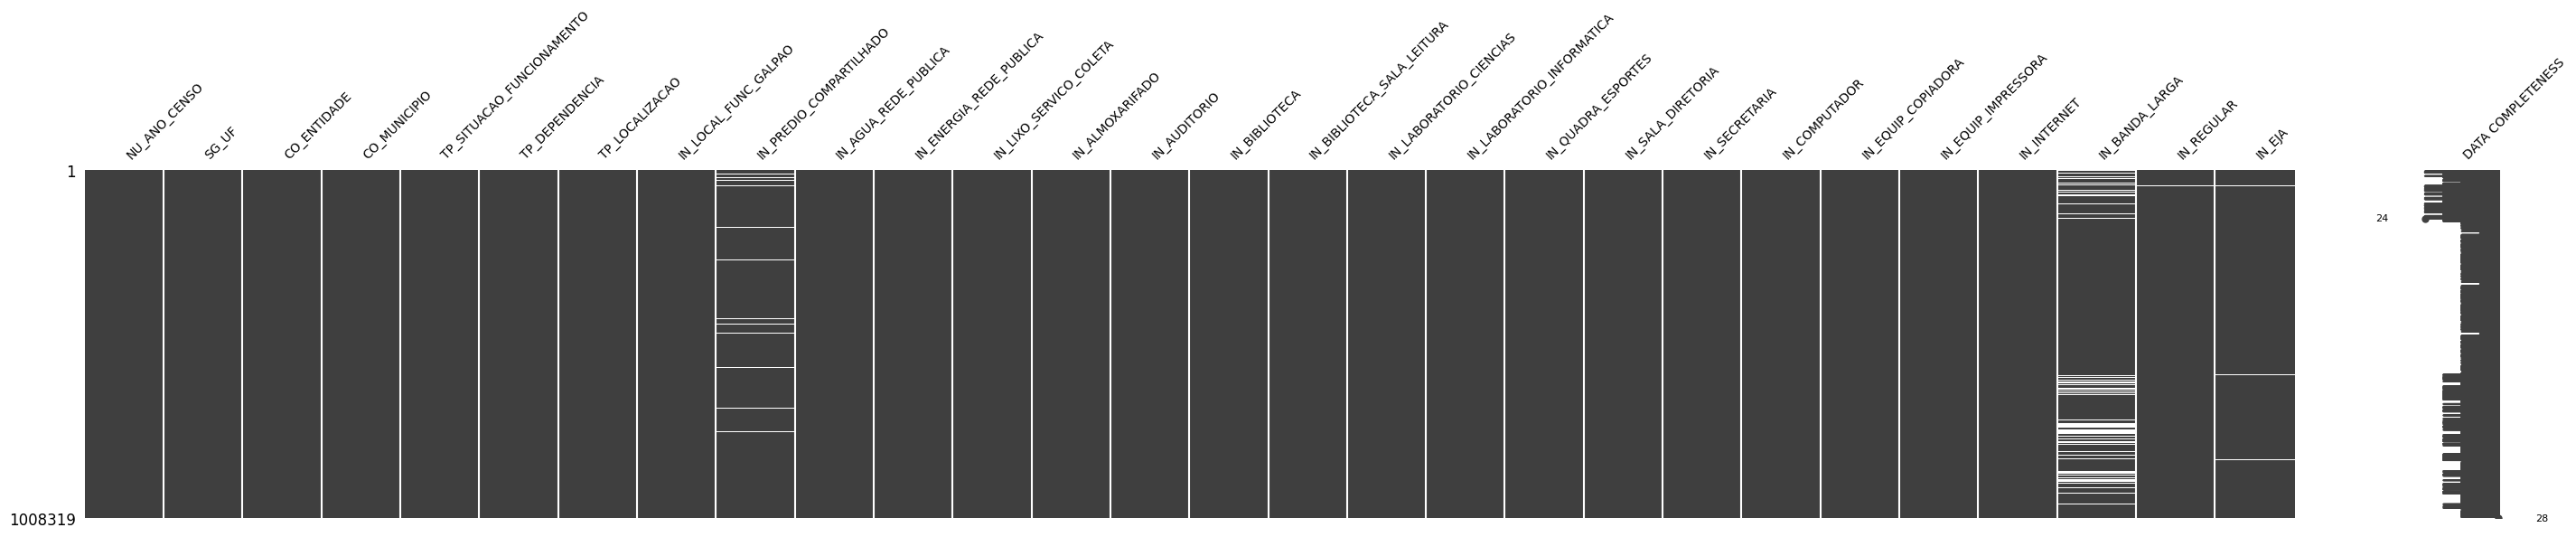

In [26]:
msno.matrix(censo,labels=True,fontsize=10,figsize=(35,5));

In [27]:
censo.shape

(1008319, 28)

In [36]:
# export data to csv
#censo.to_csv('/home/freitas/Downloads/internet2/censo_2014_2020.csv', index=False)